This notebook provides an example of how to use the `poopy` package to access historical CSO discharge monitoring data provided by water companies.

First, we import the libraries we need.

In [1]:
# To help demonstrate the package
import datetime
import os

import matplotlib.pyplot as plt

from poopy.companies import ThamesWater

First we initiate an instance of a `WaterCompany` object. We opt to use the `ThamesWater` as an example. 

In [2]:
tw_client_id = os.getenv("TW_CLIENT_ID")
tw_client_secret = os.getenv("TW_CLIENT_SECRET")

if tw_client_id is None or tw_client_secret is None:
    raise ValueError(
        "Thames Water API keys are missing from the environment!\n Please set them and try again."
    )

tw = ThamesWater(tw_client_id, tw_client_secret)

Initialising Thames Water object...
Requesting current status data from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeCurrentStatus?limit=1000&offset=0
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeCurrentStatus?limit=1000&offset=1000
	No more records to fetch


Initiating a `WaterCompany` object will automatically download the current status of all the monitors. What we want to do is explore historical information for past discharges. This can either be done at the level of the individual `Monitor` or at the level of the `WaterCompany`. Lets explore the former first using the "Bourton-On-The-Water" monitor.

In [3]:
monitor = tw.active_monitors["Bourton-On-The-Water"]
monitor.get_history()

Requesting historical data for Bourton-On-The-Water from Thames Water API...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=0&col_1=LocationName&operand_1=eq&value_1=Bourton-On-The-Water
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=1000&col_1=LocationName&operand_1=eq&value_1=Bourton-On-The-Water
	No more records to fetch
	Building history for Bourton-On-The-Water...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bourton-On-The-Water contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-12-14T09:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bourton-On-The-Water contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-12-08T13:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bourton-On-The-Water contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-12-08T13:45:00. Skipping that entry...
  warnings.warn(


Above, we ran the `get_history()` method that extracts the historical data for a given monitor. This information is stored in the `Monitor` object in the `history` attribute. This is a List of `Event` objects. For example, lets see what the fifth event in the history is. Recall that an `Event` object can either be a `Discharge`, `Offline` or `NoDischarge`. 

In [4]:
fifth_event = monitor.history[4]
fifth_event.print()


        
        --------------------------------------
        Event Type: Not Discharging
        Site Name: Bourton-On-The-Water
        Permit Number: CTCR.2036
        OSGB Coordinates: (417620, 219070)
        Receiving Watercourse: Groundwater
        Start Time: 2025-02-26 23:30:00
        End Time: 2025-02-27 19:15:00
        Duration: 1185.0 minutes
        


To visualise the history once it has been calculated we can use the `plot_history()` method. This will plot the history of the monitor as a 'barcode', the colour of the bar corresponds to the status of the event through time. Brown is a discharge, grey is offline and white is no discharge. Note that the barchart automatically goes back as far as the first recorded discharge or offline event for that monitor. 

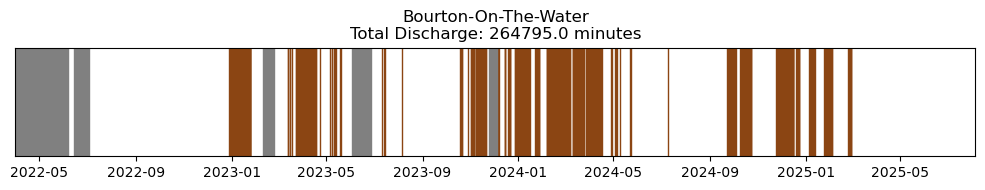

In [5]:
monitor.plot_history()

We can make it plot for a shorter period by passing a `since` parameter. For example, lets look at only the last 3 months.

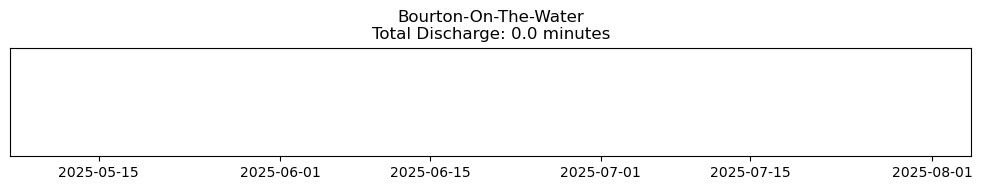

In [6]:
since_3_months = datetime.datetime.now() - datetime.timedelta(days=90) # 90 days = 3 months
monitor.plot_history(since=since_3_months)

We can print out some summary information about the total amount of discharge as follows:

In [7]:
print(f"Total discharge: {monitor.total_discharge()} minutes")
print(f"Total discharge last 12 months: {monitor.total_discharge_last_12_months()} minutes")
print(f"Total discharge last 6 months: {monitor.total_discharge_last_6_months()} minutes")
print(f"Total discharge since start of year: {monitor.total_discharge_since_start_of_year()} minutes")
print(f"Total discharge last 3 months: {monitor.total_discharge(since=since_3_months)} minutes")

Total discharge: 264795.0 minutes
Total discharge last 12 months: 73965.0 minutes
Total discharge last 6 months: 3600.0 minutes
Total discharge since start of year: 19290.0 minutes
Total discharge last 3 months: 0.0 minutes


If we want to calculate the history for all monitors managed by a particular water company we can do this by calling the `set_all_histories()` method on the `WaterCompany` object. This sets the `history` attribute of all the monitors in the `WaterCompany` object.

In [8]:
tw.set_all_histories()

Requesting historical data for all monitors from Thames Water API...
	Requesting historical events since 2022-04-01 00:30:00...
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=0
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=1000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=2000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=3000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=4000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=5000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/STE/v1/DischargeAlerts?limit=1000&offset=6000
	Requesting from https://prod-tw-opendata-app.uk-e1.cloudhub.io/data/S

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Abingdon contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-06-04T11:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Abingdon contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-05-27T07:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Abingdon contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-05-27T07:30:00. Skipping that entry...
  warnings.warn(


	Building history for Aldermaston...
	Building history for Aldershot CSO...
	Building history for Aldershot STW...
	Building history for Alicia Avenue CSO...
	Building history for Allendale Road...
	Building history for Alperton Lane...
	Building history for Amersham Balancing Tanks/Amersham Vale STK...
	Building history for Ampney St Peter...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Amersham Balancing Tanks/Amersham Vale STK contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-08-23T16:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Amersham Balancing Tanks/Amersham Vale STK contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-08-12T16:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Amersham Balancing Tanks/Amersham Vale STK contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-08-12T16:30:00. Skipping that entry...
  warnings.warn(


	Building history for Amyand Park Road, Twickenham...
	Building history for Andoversford...
	Building history for Appleton...
	Building history for Arborfield...
	Building history for Arford...
	Building history for Ascot...
	Building history for Ash Ridge (Wokingham)...
	Building history for Ash Vale...
	Building history for Aston Le Walls...
	Building history for Auckland Road Storm Tanks...
	Building history for Avon Dassett...
	Building history for Avondale Rd...
	Building history for Aylesbury...
	Building history for Bakers Farm, High Wych...
	Building history for Bampton...
	Building history for Banbury...
	Building history for Banbury Rd Middleton Cheney...
	Building history for Bancroft Rugby Ground, Buckhurst Hill 2...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Banbury Rd Middleton Cheney contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-05-30T08:06:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Banbury Rd Middleton Cheney contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-05-30T08:06:00. Skipping that entry...
  warnings.warn(


	Building history for Barbers Lane...
	Building history for Barkway...
	Building history for Basingstoke...
	Building history for Beckley...
	Building history for Beckton...
	Building history for Beddington...
	Building history for Beech Hall Crescent, Walthamstow...
	Building history for Beenham...
	Building history for Beer Lane CSO...
	Building history for Bell Wharf CSO...
	Building history for Benson...
	Building history for Bentley...
	Building history for Bentsbrook Road...
	Building history for Berkhamsted...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bentley contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-06-04T10:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bentley contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-05-15T18:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bentley contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-05-15T18:30:00. Skipping that entry...
  warnings.warn(


	Building history for Bicester...
	Building history for Birchanger - Duck End...
	Building history for Biscot Road CSO...
	Building history for Bishop Stortford Main...
	Building history for Blacknest, Sunningdale...
	Building history for Bledington...
	Building history for Bletchingdon...
	Building history for Blind Mans Gate, Highclere...
	Building history for Bloxham...
	Building history for Blunsdon...
	Building history for Boddington...
	Building history for Bordon...
	Building history for Bourton-On-The-Water...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bourton-On-The-Water contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-12-14T09:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bourton-On-The-Water contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-12-08T13:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bourton-On-The-Water contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-12-08T13:45:00. Skipping that entry...
  warnings.warn(


	Building history for Box Hill...
	Building history for Boyne Avenue, Hendon...
	Building history for Bracknell...
	Building history for Bramley...
	Building history for Brent Cross Flyover...
	Building history for Brent Valley Golf Course, LB Ealing...
	Building history for Brentfield Gardens...
	Building history for Brentfield Gardens 2...
	Building history for Brickendon...
	Building history for Brixton and Clapham Storm Relief CSO...
	Building history for Broadwell...
	Building history for Brockham Bridge...
	Building history for Brook Way, Chigwell...
	Building history for Broome (Attenuation Tank)...
	Building history for Bucklebury (Briff Lane)...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bucklebury (Briff Lane) contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-11-07T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bucklebury (Briff Lane) contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-10-28T09:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Bucklebury (Briff Lane) contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-10-28T09:30:00. Skipping that entry...
  warnings.warn(


	Building history for Bucknell...
	Building history for Buntingford...
	Building history for Burford...
	Building history for Burghfield...
	Building history for Burstow...
	Building history for Bushey Court, Raynes Park...
	Building history for Bute Street CSO...
	Building history for Byfield...
	Building history for Caddington...
	Building history for Cage End, Essex...
	Building history for Camberley...
	Building history for Canfield End, Little Canfield...
	Building history for Canfold Wood...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Canfield End, Little Canfield contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-05-05T06:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Canfield End, Little Canfield contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-03-22T11:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Canfield End, Little Canfield contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-03-22T11:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning

	Building history for Canterbury Road, Thornton Heath...
	Building history for Capel...
	Building history for Carlton Cres Jnc Blenheim Cres...
	Building history for Carterton...
	Building history for Cascade Road Storm Tanks, Buckhurst...
	Building history for Cassington...
	Building history for Castle Drive...
	Building history for Castle Gardens, Dorking...
	Building history for Chacombe...
	Building history for Chadlington...
	Building history for Chalgrove...
	Building history for Chapel Row (Berks)...
	Building history for Chapmore End...
	Building history for Charlbury...
	Building history for Charlton Storm Relief A CSO...
	Building history for Charlton Storm Relief B CSO...
	Building history for Charlton Storm Relief C CSO...
	Building history for Charlton-On-Otmoor...
	Building history for Charlwood, Surrey...
	Building history for Chelsea, London, Sw10...
	Building history for Chertsey...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Charlwood, Surrey contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-08-15T09:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Charlwood, Surrey contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-06-18T04:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Charlwood, Surrey contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-06-18T04:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monit

	Building history for Chesham...
	Building history for Chieveley...
	Building history for Chigwell Road / Langston Road...
	Building history for Chigwell Road, Woodford Green A...
	Building history for Chigwell Road, Woodford Green B...
	Building history for Chigwell Road, Woodford Green C...
	Building history for Chigwell Road, Woodford Green D...
	Building history for Chigwell Road, Woodford Green E...
	Building history for Chigwell Road, Woodford Green F...
	Building history for Chigwell Road, Woodford Green G...
	Building history for Chigwell Road, Woodford Green H...
	Building history for Chingford Storm Tanks...
	Building history for Chinnor...
	Building history for Chipping Norton...
	Building history for Chipping Warden...
	Building history for Chisledon Storm Tanks ...
	Building history for Chobham...
	Building history for Cholsey...
	Building history for Church Hanborough...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Cholsey contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-01-14T07:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Cholsey contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-01-10T10:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Cholsey contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-01-10T10:30:00. Skipping that entry...
  warnings.warn(


	Building history for Church Hill Road, Barnet...
	Building history for Church Road...
	Building history for Church Road/Brent Lodge Park (Bunny Park)...
	Building history for Church Street CSO...
	Building history for Churt...
	Building history for Cirencester...
	Building history for Clanfield...
	Building history for Clifton...
	Building history for Cobham Bridge, Adj Cobham PS...
	Building history for Codicote...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Codicote contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-10-24T07:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Codicote contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-10-11T14:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Codicote contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-10-11T14:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Colin Crescent, Colindal

	Building history for Codicote CSO...
	Building history for Colgate...
	Building history for Colin Crescent, Colindale...
	Building history for Combe...
	Building history for Commonside...
	Building history for Compton (Berks)...
	Building history for Conolly Road Hanwell...
	Building history for Coppice Green, Bracknell...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Compton (Berks) contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-12-24T00:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Compton (Berks) contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-12-23T07:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Compton (Berks) contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-12-23T07:30:00. Skipping that entry...
  warnings.warn(


	Building history for Cottered...
	Building history for Cranleigh...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Cranleigh contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-01-17T10:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Cranleigh contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-01-03T05:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Cranleigh contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-01-03T05:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Crawley contains an i

	Building history for Crawley...
	Building history for Cricklade...
	Building history for Cricklewood Broadway...
	Building history for Crofton Road, Sunnydale...
	Building history for Crondall...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Crofton Road, Sunnydale contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-03-03T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Crofton Road, Sunnydale contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-02-07T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Crofton Road, Sunnydale contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-02-07T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Aler

	Building history for Crooked Billet...
	Building history for Cropredy...
	Building history for Crossness...
	Building history for Cuddington...
	Building history for Culham...
	Building history for Culworth...
	Building history for Dagnall...
	Building history for Daintry Close...
	Building history for Dallow Road Jnc Lyndhurst Road...
	Building history for Darkes Lane, Potters Bar...
	Building history for Dartford Creek Storm...
	Building history for Dartnell Park, Byfleet...
	Building history for Deadmans Bridge...
	Building history for Dean Oak Lane...
	Building history for Deephams...
	Building history for Deptford Creek CSO...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Deephams contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-07-30T10:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Deephams contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-07-30T10:00:00. Skipping that entry...
  warnings.warn(


	Building history for Deptford Storm Relief CSO...
	Building history for Didcot...
	Building history for District Road...
	Building history for Dorchester...
	Building history for Dorking...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Dorchester contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-01-09T10:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Dorchester contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-01-02T02:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Dorchester contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-01-02T02:00:00. Skipping that entry...
  warnings.warn(


	Building history for Dorking Road...
	Building history for Dorton...
	Building history for Draycot Foliat...
	Building history for Drayton (Oxon)...
	Building history for Dunstable Road - Beech Road...
	Building history for Dunstable Road - Beech Road CSO 2...
	Building history for Dunstable Road - Francis Street...
	Building history for Duntshill Road...
	Building history for Earl Pumping Station CSO...
	Building history for Earlswood (Reigate)...
	Building history for Earlswood Common, S Of Pendleton Road...
	Building history for East Garston...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Earl Pumping Station CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-02-01T12:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Earl Pumping Station CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-05-24T16:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Earl Pumping Station CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-05-24T16:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! A

	Building history for East Grafton...
	Building history for East Hyde...
	Building history for East Lane CSO 1...
	Building history for East Shefford...
	Building history for Eastcote Avenue...
	Building history for Easthampstead Park...
	Building history for Edgware Road...
	Building history for Elmcroft Avenue, Wanstead A...
	Building history for Elmcroft Avenue, Wanstead B...
	Building history for Elmcroft Avenue, Wanstead C...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Elmcroft Avenue, Wanstead A contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-09-01T10:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Elmcroft Avenue, Wanstead A contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-08-14T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Elmcroft Avenue, Wanstead A contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-08-14T08:15:00. Skipping that entry...
  warnings.warn(


	Building history for Elmcroft Avenue, Wanstead D...
	Building history for Elmcroft Avenue, Wanstead E...
	Building history for Elmcroft Avenue, Wanstead F...
	Building history for Elmcroft Avenue, Wanstead G...
	Building history for Elmcroft Avenue, Wanstead H...
	Building history for Elms Road CSO...
	Building history for Elvetham Close...
	Building history for Empress Avenue ...
	Building history for Epsom Storm Tanks, Longmead Road...
	Building history for Esher...
	Building history for Essendon, Holywell Bridge...
	Building history for Ewhurst Road, Cranleigh, Surrey...
	Building history for Eydon...
	Building history for Fairfield Avenue 1...
	Building history for Fairford...
	Building history for Falconbrook Pumping Station CSO...
	Building history for Falloden Court & Brookland Rise...
	Building history for Faringdon...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Falloden Court & Brookland Rise contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-11-03T21:56:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Falloden Court & Brookland Rise contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-11-01T12:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Falloden Court & Brookland Rise contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-11-01T12:00:00. Skipping that entry...
  warnings.warn(


	Building history for Faringdon House CSO...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Faringdon House CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-06-14T15:06:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Faringdon House CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-06-10T13:14:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Faringdon House CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-06-10T13:14:00. Skipping that entry...
  warnings.warn(


	Building history for Farnborough (Warks)...
	Building history for Farnham...
	Building history for Fergusson Road, Banbury...
	Building history for Fiddlers Hamlet...
	Building history for Field End Rd Storm (Harrow)...
	Building history for Field End Road (East)...
	Building history for Finstock...
	Building history for Fleet...
	Building history for Fleet Main CSO...
	Building history for Folkestone Rd Tanks, East Ham...
	Building history for Forest Hill...
	Building history for Francis Road Spill...
	Building history for Friday Street, Henley...
	Building history for Frogmore Storm Relief (Bell Lane Creek) CSO...
	Building history for Frogmore Storm Relief (River Wandle) CSO...
	Building history for Fulmer Drive CSO (Howards Wood Drive)...
	Building history for Fyfield (Wilts)...
	Building history for Gap Road (Cemetery)...
	Building history for Garden Way...
	Building history for Gascoigne Rd Storm Tanks, Beckton...
	Building history for George Street - King Street...
	Building hi

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Frogmore Storm Relief (River Wandle) CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-08-29T12:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Frogmore Storm Relief (River Wandle) CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-07-25T00:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Frogmore Storm Relief (River Wandle) CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-07-25T00:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy

	Building history for Godalming...
	Building history for Gordon Road (Redbridge)...
	Building history for Gordon Road (West Finchley)...
	Building history for Goring...
	Building history for Goswell Street CSO...
	Building history for Grampian Gardens...
	Building history for Granville Road...
	Building history for Great Bedwyn...
	Building history for Greatworth...
	Building history for Greenwich Pumping Station CSO...
	Building history for Grendon Underwood...
	Building history for Grosvenor Ditch CSO...
	Building history for Guildford...
	Building history for Gun Wharf (Wapping Dock) CSO...
	Building history for Haddenham...
	Building history for Hadham Mill...
	Building history for Hambleden...
	Building history for Hammersmith Pumping Station CSO...
	Building history for Hampstead Norreys...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hammersmith Pumping Station CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-09-02T13:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hammersmith Pumping Station CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-09-02T07:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hammersmith Pumping Station CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-09-02T07:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserW

	Building history for Hamstead Marshall...
	Building history for Hanger Lane...
	Building history for Hannington...
	Building history for Hanwell...
	Building history for Harpenden...
	Building history for Hartley Wintney...
	Building history for Haslemere...
	Building history for Haslemere STW CSO...
	Building history for Hatfield Heath...
	Building history for Hattchets Cricklade...
	Building history for Heathwall Pumping Station CSO...
	Building history for Henley...
	Building history for Henley Road CSO...
	Building history for Heyford...
	Building history for High Road, Woodford...
	Building history for High Wycombe...
	Building history for Highfield Road Jct With Brookside Road...
	Building history for Highworth...
	Building history for Highworth Eastrop...
	Building history for Hillside Avenue...
	Building history for Hockford (Pirbright)...
	Building history for Hogsmill...
	Building history for Holloway Storm Relief Sewer CSO...
	Building history for Holmwood...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hogsmill contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-02-29T08:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hogsmill contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-02-05T09:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hogsmill contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-02-05T09:15:00. Skipping that entry...
  warnings.warn(


	Building history for Holybourne...
	Building history for Home Park Road...
	Building history for Honeypot Lane...
	Building history for Hook Norton...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hook Norton contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-01-06T13:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hook Norton contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-01-06T08:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Hook Norton contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-01-06T08:30:00. Skipping that entry...
  warnings.warn(


	Building history for Horley (Oxon)...
	Building history for Horley (Surrey)...
	Building history for Hornton...
	Building history for Horseferry Road CSO...
	Building history for Horton-Cum-Studley...
	Building history for Huckers Lane (Selbourne)...
	Building history for Hull Green (Matching)...
	Building history for Hungerford...
	Building history for Hurstwood Road West...
	Building history for Iron Gate CSO...
	Building history for Ironsbottom (Sidlow)...
	Building history for Isle of Dogs Pumping Station CSO...
	Building history for Islip...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Ironsbottom (Sidlow) contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-02-03T10:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Ironsbottom (Sidlow) contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-12-16T17:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Ironsbottom (Sidlow) contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-12-16T17:30:00. Skipping that entry...
  warnings.warn(


	Building history for Iver (North)...
	Building history for Jews Row Pumping Station (Falconbrook Storm Relief) CSO...
	Building history for Jews Row Wandle Valley Storm Relief CSO...
	Building history for Jnc Biscot Road - Lansdowne Road...
	Building history for Jnc Frederick Street & William Street...
	Building history for Jnc Portland Road - Churchill Road...
	Building history for Joyce Green West Syphon...
	Building history for Kempsford...
	Building history for Kendal Road, Cullingworth Road...
	Building history for Kew Transfer...
	Building history for Kilda Road...
	Building history for Kimpton Road (Vauxhall Rd)...
	Building history for Kingham...
	Building history for Kings Avenue...
	Building history for Kings Scholar Pond CSO...
	Building history for Kings Sutton...
	Building history for Kingsclere...
	Building history for Kingston Bagpuize...
	Building history for Kingston Main...
	Building history for Kingsway (Near Railway Bridge)...
	Building history for Kingthorpe Terra

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Knights Lane contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-04-06T10:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Knights Lane contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-12-21T05:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Knights Lane contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-12-21T05:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Leatherhead 

	Building history for Lechlade...
	Building history for Leopold Road, Church Path...
	Building history for Lightwater...
	Building history for Lincoln Road CSO...
	Building history for Lindsay Drive, Falcon Way...
	Building history for Little Compton...
	Building history for Little Hallingbury...
	Building history for Little Marlow...
	Building history for Little Milton...
	Building history for Littlemead Ind Estate, Cranleigh...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Littlemead Ind Estate, Cranleigh contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-01-23T08:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Littlemead Ind Estate, Cranleigh contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-01-02T08:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Littlemead Ind Estate, Cranleigh contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-01-02T08:00:00. Skipping that entry...
  warnings.warn(


	Building history for Littlemore Low Level...
	Building history for London Bridge CSO...
	Building history for London Road, Marlborough...
	Building history for Long Crendon...
	Building history for Long Reach...
	Building history for Longbridge Road A...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor London Bridge CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-10-09T13:42:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor London Bridge CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-11-28T17:52:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor London Bridge CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-11-28T17:52:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monit

	Building history for Longbridge Road B...
	Building history for Longley Road (1), Tooting High Street...
	Building history for Longstone Ave, Drayton Road...
	Building history for Lots Road Pumping Station CSO...
	Building history for Low Hall Farm Storm Tanks, Walthamstow...
	Building history for Lower Cherwell St, Banbury...
	Building history for Ludgershall...
	Building history for Lyon Park Avenue...
	Building history for Lytton Road SSO...
	Building history for Maidenhead...
	Building history for Main Road, Sidcup...
	Building history for Manor Drive Stormwater Tanks...
	Building history for Manor Farm...
	Building history for Maple Lodge...
	Building history for Mapleton Road...
	Building history for Markenfield Road, Guildford...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Manor Drive Stormwater Tanks contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-01-26T09:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Manor Drive Stormwater Tanks contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-01-19T10:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Manor Drive Stormwater Tanks contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-01-19T10:00:00. Skipping that entry...
  warnings.warn(


	Building history for Markyate...
	Building history for Marlborough...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Marlborough contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-02-15T18:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Marlborough contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-02-15T10:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Marlborough contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-02-15T10:00:00. Skipping that entry...
  warnings.warn(


	Building history for Marsh Gibbon...
	Building history for Marsh Lane Bridge, Taplow...
	Building history for Marston St Lawrence...
	Building history for Marsworth...
	Building history for Mays Lane Overflow ...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Marsh Lane Bridge, Taplow contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-06-24T09:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Marsh Lane Bridge, Taplow contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-06-10T07:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Marsh Lane Bridge, Taplow contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-06-10T07:15:00. Skipping that entry...
  warnings.warn(


	Building history for Melford Road, London, E11...
	Building history for Merstham...
	Building history for Middle Barton...
	Building history for Middleton Cheney...
	Building history for Middleton Stoney...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Middleton Cheney contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2022-12-20T07:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Middleton Cheney contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-12-12T21:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Middleton Cheney contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-12-12T21:30:00. Skipping that entry...
  warnings.warn(


	Building history for Midgham...
	Building history for Mill Green (Hatfield)...
	Building history for Millbank, Crawley...
	Building history for Milton-Under-Wychwood...
	Building history for Mogden...
	Building history for Moreton Pinkney...
	Building history for Moreton-In-Marsh...
	Building history for Moreton-In-Marsh (Primrose Court)...
	Building history for Mornington Crescent...
	Building history for Mortimer (Stratfield)...
	Building history for Mulberry Court, Hall Road...
	Building history for Nags Head Lane (Brentwood)...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Mulberry Court, Hall Road contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-10-18T08:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Mulberry Court, Hall Road contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-09-10T15:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Mulberry Court, Hall Road contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-09-10T15:00:00. Skipping that entry...
  warnings.warn(


	Building history for Near Sezincote Lodge...
	Building history for Neasden Station...
	Building history for Netherlands Road CSO...
	Building history for New Bedford Road, Luton...
	Building history for New Mill (Eversley Lower Common)...
	Building history for Newbury...
	Building history for Newmans Lane...
	Building history for Nightingale Lane CSO...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Nightingale Lane CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-03-30T14:20:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Nightingale Lane CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-11-28T15:36:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Nightingale Lane CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-11-28T15:36:00. Skipping that entry...
  warnings.warn(


	Building history for Norfolk Street...
	Building history for North East Storm Relief CSO...
	Building history for North End Road CSO...
	Building history for North Weald...
	Building history for North West Storm Relief CSO...
	Building history for Northleach...
	Building history for Northumberland Street CSO...
	Building history for Nutter Lane / Preston Drive, Wanstead...
	Building history for Oak Hill Park CSO...
	Building history for Oakentrough...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Northumberland Street CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-07-07T12:36:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Northumberland Street CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-06-29T05:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Northumberland Street CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-06-29T05:00:00. Skipping that entry...
  warnings.warn(


	Building history for Oakley Road...
	Building history for Ockham Road South Foul Sewer Overflow...
	Building history for Ockley Road...
	Building history for Old Palace Lane ...
	Building history for Outside 115 Wentworth Road...
	Building history for Outside 135 Leeside Crescent (Formerly Brookside Road, Golders Green)...
	Building history for Oxford...
	Building history for Pangbourne...
	Building history for Park Street - Bailey Street...
	Building history for Park Street - Opp Parmead (lower level weir)...
	Building history for Park Town South & West, Luton...
	Building history for Passfield...
	Building history for Pauls Pier CSO...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Pauls Pier CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-05-14T10:16:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Pauls Pier CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-03-26T10:10:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Pauls Pier CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-03-26T10:10:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Pease 

	Building history for Pavilion in Roxbourne Park...
	Building history for Pease Pottage...
	Building history for Penwith Road...
	Building history for Peterborough Road 1...
	Building history for Pinkham Way Storm Sewage O/F, London...
	Building history for Portsmouth Road, Uxbridge Road...
	Building history for Princes Avenue...
	Building history for Princes Risborough...
	Building history for Priory Lane Storm, Mortlake...
	Building history for Priory Road, Dartford (Foul)...
	Building history for Prospect Road, Woodford Monkhams Lane...
	Building history for Prospect Road, Woodford Oxford Road...
	Building history for Puller Rd/Calvert Rd Storm, Barnet...
	Building history for Purton...
	Building history for Putney Bridge CSO...
	Building history for Queen Street CSO...
	Building history for Ramsbury...
	Building history for Ranelagh CSO...
	Building history for Ratcliffe Highway Limekiln CSO...
	Building history for Ratley...
	Building history for Ray Lodge Road (Ray Park 1)...
	Bu

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Rous Road, Buckhurst Hill contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-07-23T07:16:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Rous Road, Buckhurst Hill contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-07-08T08:50:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Rous Road, Buckhurst Hill contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-07-08T08:50:00. Skipping that entry...
  warnings.warn(


	Building history for Rowsham...
	Building history for Ruislip Road East...
	Building history for Rusper...
	Building history for Rye Meads...
	Building history for Salfords, Surrey...
	Building history for Sandhurst...
	Building history for Savoy Street CSO...
	Building history for Selborne...
	Building history for Sevenhampton Village...
	Building history for Shabbington...
	Building history for Shad, Thames...
	Building history for Shamley Green (Wonersh)...
	Building history for Sherfield-On-Loddon...
	Building history for Shotteswell...
	Building history for Shrivenham...
	Building history for Shutford...
	Building history for Silchester...
	Building history for Slough...
	Building history for Smith Street CSO...
	Building history for Somerset Road, Wimbledon...
	Building history for Sonning Common...
	Building history for South Ealing Road, W5...
	Building history for South Lane, Ash...
	Building history for South Leigh...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Smith Street CSO contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-09-01T10:40:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Smith Street CSO contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-08-05T14:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Smith Street CSO contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-08-05T14:00:00. Skipping that entry...
  warnings.warn(


	Building history for South Moreton...
	Building history for South Norwood...
	Building history for South Park, Ilford...
	Building history for South West Storm Relief CSO...
	Building history for Spooks Hill, North Holmwood...
	Building history for SSO, Junction Crane Valley/Bathroadse...
	Building history for St Andrews Road, Black Horse Lane...
	Building history for St Jamess Road...
	Building history for St Pauls Avenue CSO...
	Building history for St Stephens Hall (Little London)...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor St Stephens Hall (Little London) contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-05-13T10:56:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor St Stephens Hall (Little London) contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-05-08T07:06:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor St Stephens Hall (Little London) contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-05-08T07:06:00. Skipping that entry...
  warnings.warn(


	Building history for Stag Lane CSO...
	Building history for Stamford Brook...
	Building history for Standlake...
	Building history for Standon...
	Building history for Stanford-In-The-Vale...
	Building history for Stansted Airport...
	Building history for Stansted Mountfitchet...
	Building history for Stanton Fitzwarren STW...
	Building history for Stanton Harcourt...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Stanton Fitzwarren STW contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-10-15T20:56:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Stanton Fitzwarren STW contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-10-13T16:00:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Stanton Fitzwarren STW contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-10-13T16:00:00. Skipping that entry...
  warnings.warn(


	Building history for Stewkley...
	Building history for Stoke Road, Cobham...
	Building history for Stone...
	Building history for Stonebridge Brook...
	Building history for Stonebridge SSO, Brockham...
	Building history for Streatham & Balham Storm Relief A...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Stonebridge SSO, Brockham contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-06-16T07:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Stonebridge SSO, Brockham contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-05-27T08:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Stonebridge SSO, Brockham contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-05-27T08:45:00. Skipping that entry...
  warnings.warn(


	Building history for Streatham & Balham Storm Relief B...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Streatham & Balham Storm Relief B contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-05-02T07:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Streatham & Balham Storm Relief B contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-04-16T19:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Streatham & Balham Storm Relief B contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-04-16T19:15:00. Skipping that entry...
  warnings.warn(


	Building history for Streatham Storm Relief A...
	Building history for Streatham Storm Relief B...
	Building history for Streatham Storm Relief C...
	Building history for Streatham Storm Relief D...
	Building history for Streatham Storm Relief E...
	Building history for Streatham Storm Relief F...
	Building history for Streatham Storm Relief G...
	Building history for Streatham Storm Relief H...
	Building history for Streatham Vale Storm Relief...
	Building history for Sudbury Heights Ave, Allendale Road...
	Building history for Sunnyside Road...
	Building history for Swains Road...
	Building history for Swindon (Rodbourne)...
	Building history for Tackley...
	Building history for Takeley...
	Building history for Takeley - Garnetts...
	Building history for Taylors Crescent, Cranleigh...
	Building history for Temple Place Essex Street...
	Building history for Tetsworth...
	Building history for Thame...
	Building history for The Broadway (Ray Park 2)...
	Building history for The Willows

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Trumpers Way, W7 contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-08-24T08:06:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Trumpers Way, W7 contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2023-08-14T13:16:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Trumpers Way, W7 contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2023-08-14T13:16:00. Skipping that entry...
  warnings.warn(


	Building history for Trumps Green...
	Building history for Tubney...
	Building history for Uffington...
	Building history for Vauxhall Motors...
	Building history for Waddesdon...
	Building history for Wanborough...
	Building history for Wantage...
	Building history for Wardington...
	Building history for Wargrave...
	Building history for Warmington...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Warmington contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2025-02-11T08:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Warmington contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2025-02-06T08:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Warmington contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2025-02-06T08:30:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Warmington contain

	Building history for Washwater...
	Building history for Water End...
	Building history for Waterloo Crescent Outfall, Wokingham...
	Building history for Watery Lane, Startops End...
	Building history for Watlington...


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Waterloo Crescent Outfall, Wokingham contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2024-07-01T07:46:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Waterloo Crescent Outfall, Wokingham contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2024-05-08T11:26:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Waterloo Crescent Outfall, Wokingham contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2024-05-08T11:26:00. Skipping that entry...
  warnings.warn(


	Building history for Waverley Lane...
	Building history for Wealdbridge, North Weald...
	Building history for Well Hall Road Eltham...
	Building history for West End, Essendon...
	Building history for West Ham Lane CSO...
	Building history for West Heath Ramsdell...
	Building history for West Putney Storm Relief CSO...
	Building history for West Way, Botley (Syphon)...
	Building history for Western Pumping Station CSO...
	Building history for Western Way...
	Building history for Weston (Herts)...
	Building history for Weston Park...
	Building history for Weston-On-The-Green...
	Building history for Weston-On-The-Green STW...
	Building history for Westway Close...
	Building history for Weybridge...
	Building history for Wheathampstead...
	Building history for Wheatley...
	Building history for White Roding...
	Building history for White Waltham...
	Building history for Whitwell...
	Building history for Widford And Wareside...
	Building history for Wildernesse, Shoreham...
	Building hist

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Woking contains an invalid entry! 
Reason: an offline Stop event was not preceded by Offline Start event at 2023-01-10T15:15:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Woking contains an invalid entry! 
Reason: a stop event was not preceded by Start event at 2022-11-16T19:45:00. Skipping that entry...
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1296: UserWarning: ! WARNING ! Alert stream for monitor Woking contains an invalid entry! 
Reason: a Start or Offline Start event was preceded by a Start or Offline Start event at 2022-11-16T19:45:00. Skipping that entry...
  warnings.warn(


	Building history for Worcester Crescent...
	Building history for Worminghall...
	Building history for Worple Road, SW19...
	Building history for Wynters Brook, Hastingwood...


Then, the monitor's history object can be accessed as before. For example, lets get the history for the "Marlborough" monitor.

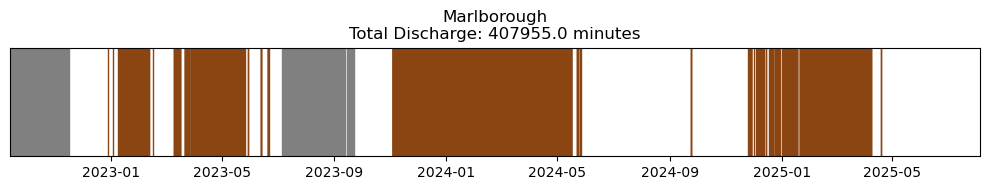

In [9]:
monitor = tw.active_monitors["Marlborough"]
monitor.plot_history()

We can query what event was occurring at a particular time as follows: 

In [10]:
time = datetime.datetime(2024, 1, 1)
event = monitor.event_at(time)
event.print()


        
        --------------------------------------
        Event Type: Discharging
        Site Name: Marlborough
        Permit Number: TEMP.2763
        OSGB Coordinates: (420120, 169200)
        Receiving Watercourse: River Kennet
        Start Time: 2023-12-31 15:45:00
        End Time: 2024-01-01 00:45:00
        Duration: 540.0 minutes
        


Alternatively, we can get all of the discharge events in the form of a `pandas` dataframe using the `get_history_df()` method. This returns a dataframe that contains all the discharge events for all the monitors managed by the water company, sorted from newest to oldest start times. This dataframe can then be analysed using standard pandas methods. The head of this dataframe is shown below:

In [11]:
df = tw.history_to_discharge_df()
print(df.head())

Building output data-table
	Processing (Northern) Low Level No1 Brook Green CSO
	Processing 15 Coldharbour Lane, Bushey
	Processing Abbess Roding
	Processing Abbey Mills Pumping Station CSO
	Processing Abbeydale Road
	Processing Abingdon
	Processing Acton Storm Relief CSO
	Processing Aldermaston
	Processing Aldershot CSO
	Processing Aldershot STW
	Processing Alicia Avenue CSO
	Processing Allendale Road
	Processing Alperton Lane
	Processing Amersham Balancing Tanks/Amersham Vale STK
	Processing Ampney St Peter
	Processing Amyand Park Road, Twickenham
	Processing Andoversford
	Processing Appleton
	Processing Arborfield
	Processing Arford
	Processing Ascot
	Processing Ash Ridge (Wokingham)
	Processing Ash Vale
	Processing Aston Le Walls
	Processing Auckland Road Storm Tanks
	Processing Avon Dassett
	Processing Avondale Rd
	Processing Aylesbury
	Processing Bakers Farm, High Wych
	Processing Bampton
	Processing Banbury
	Processing Banbury Rd Middleton Cheney
	Processing Bancroft Rugby Groun

This can then be saved to file using the standard Pandas methods. For example, to save it as a CSV file that can be analysed using other tools (e.g, Excel) we can do the following:

In [12]:
filename = tw.name + tw.history_timestamp.strftime("%y%m%d%H%M%S") + ".csv"
print(f"Saving history to {filename}")
df.to_csv(filename, header=True, index=False)

Saving history to ThamesWater250804164229.csv


We can do a similar thing for the offline events using the `history_to_offline_df()` method. This returns a dataframe that contains all the offline events for all the monitors managed by the water company, sorted from newest to oldest start times.

In [13]:
offline_df = tw.history_to_offline_df()
print(offline_df.head())

Building output data-table
	Processing (Northern) Low Level No1 Brook Green CSO
	Processing 15 Coldharbour Lane, Bushey
	Processing Abbess Roding
	Processing Abbey Mills Pumping Station CSO
	Processing Abbeydale Road
	Processing Abingdon
	Processing Acton Storm Relief CSO
	Processing Aldermaston
	Processing Aldershot CSO
	Processing Aldershot STW
	Processing Alicia Avenue CSO
	Processing Allendale Road
	Processing Alperton Lane
	Processing Amersham Balancing Tanks/Amersham Vale STK
	Processing Ampney St Peter
	Processing Amyand Park Road, Twickenham
	Processing Andoversford
	Processing Appleton
	Processing Arborfield
	Processing Arford
	Processing Ascot
	Processing Ash Ridge (Wokingham)
	Processing Ash Vale
	Processing Aston Le Walls
	Processing Auckland Road Storm Tanks
	Processing Avon Dassett
	Processing Avondale Rd
	Processing Aylesbury
	Processing Bakers Farm, High Wych
	Processing Bampton
	Processing Banbury
	Processing Banbury Rd Middleton Cheney
	Processing Bancroft Rugby Groun

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:581: UserWarning: !ADVISORY! This Offline event for 'Banbury Rd Middleton Cheney' (in ThamesWater) is ongoing. `end_time` attribute returns None.
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:1548: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, event._to_row()], ignore_index=True)
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:581: UserWarning: !ADVISORY! This Offline event for 'Chigwell Road, Woodford Green D' (in ThamesWater) is ongoing. `end_time` attribute returns None.
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:581: UserWarning: !ADVISORY! This Offline event for 'Chipping Warden' (

	Processing Puller Rd/Calvert Rd Storm, Barnet
	Processing Purton
	Processing Putney Bridge CSO
	Processing Queen Street CSO
	Processing Ramsbury
	Processing Ranelagh CSO
	Processing Ratcliffe Highway Limekiln CSO
	Processing Ratley
	Processing Ray Lodge Road (Ray Park 1)
	Processing Reading
	Processing Reading, Blakes Lock
	Processing Reading, Caversham
	Processing Redbridge Lane West, Wanstead
	Processing Regent Street
	Processing Ripley
	Processing River Lane
	Processing Riverside
	Processing Road A217, Burgh Heath
	Processing Road A3, Roehampton Vale
	Processing Roding Valley
	Processing Rotherwick
	Processing Rous Road, Buckhurst Hill
	Processing Rowsham
	Processing Ruislip Road East
	Processing Rusper
	Processing Rye Meads
	Processing Salfords, Surrey
	Processing Sandhurst
	Processing Savoy Street CSO
	Processing Selborne
	Processing Sevenhampton Village
	Processing Shabbington
	Processing Shad, Thames
	Processing Shamley Green (Wonersh)
	Processing Sherfield-On-Loddon
	Processin

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:581: UserWarning: !ADVISORY! This Offline event for 'Savoy Street CSO' (in ThamesWater) is ongoing. `end_time` attribute returns None.
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:581: UserWarning: !ADVISORY! This Offline event for 'Stonebridge Brook' (in ThamesWater) is ongoing. `end_time` attribute returns None.
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:581: UserWarning: !ADVISORY! This Offline event for 'Temple Place Essex Street' (in ThamesWater) is ongoing. `end_time` attribute returns None.
  warnings.warn(


We may want to work out the particular downstream impact at a given point in time. For example, if we wanted to know how many upstream discharges were ocurring at a particular point in the drainage network at a specific point in time. This is possible as follows: 

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:397: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Allendale Road. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:397: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Bampton. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:397: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Barbers Lane. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:397: UserWarning: 
! WARNING ! No event found at 2024-07-16 00:00:00 for Birchanger - Duck End. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/resea

(Text(0.5, 0, 'Easting'), Text(0, 0.5, 'Northing'))

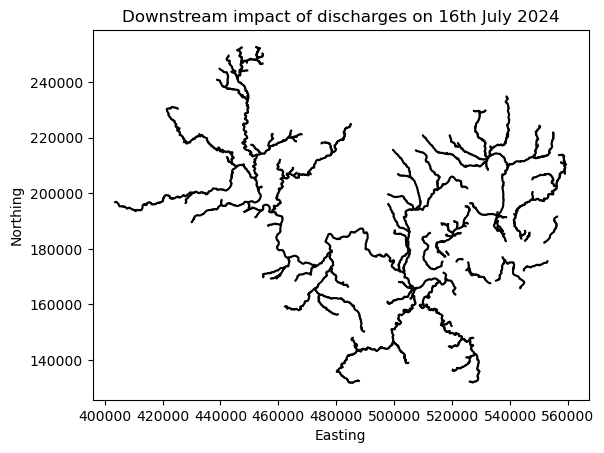

In [14]:
time = datetime.datetime(2024, 7, 16) # 16th July 2024
downstream = tw.get_historical_downstream_impact_at(time=time, include_recent_discharges=True) # Calculate downstream impact on 16th July, including recent discharges (within 48 hours)

# `downstream` is a 2D numpy array with the # number of discharges upstream of each cell on the DEM grid
# We can cast it to a geojson for easier visualisation

geojson = tw._accumulator.get_channel_segments(downstream, threshold=0.9)
segs = tw._accumulator.get_channel_segments(downstream, threshold=0.9)
for line in segs["coordinates"]:
    x = [c[0] for c in line]
    y = [c[1] for c in line]
    plt.plot(x, y, color="k")
plt.title("Downstream impact of discharges on 16th July 2024")
plt.xlabel("Easting"), plt.ylabel("Northing")

In fact, we can go further and calculate more detailed information about the downstream impact of CSOs at any point in the past. For example, we can calculate the total number of upstream discharges, and the number of upstream discharges per unit area, as well as the list of names of upstream discharges. This is done as follows: 

In [15]:
info_geojson = tw.get_historical_downstream_info_geojson_at(time=time, include_recent_discharges=True)

We can then visualise this: 

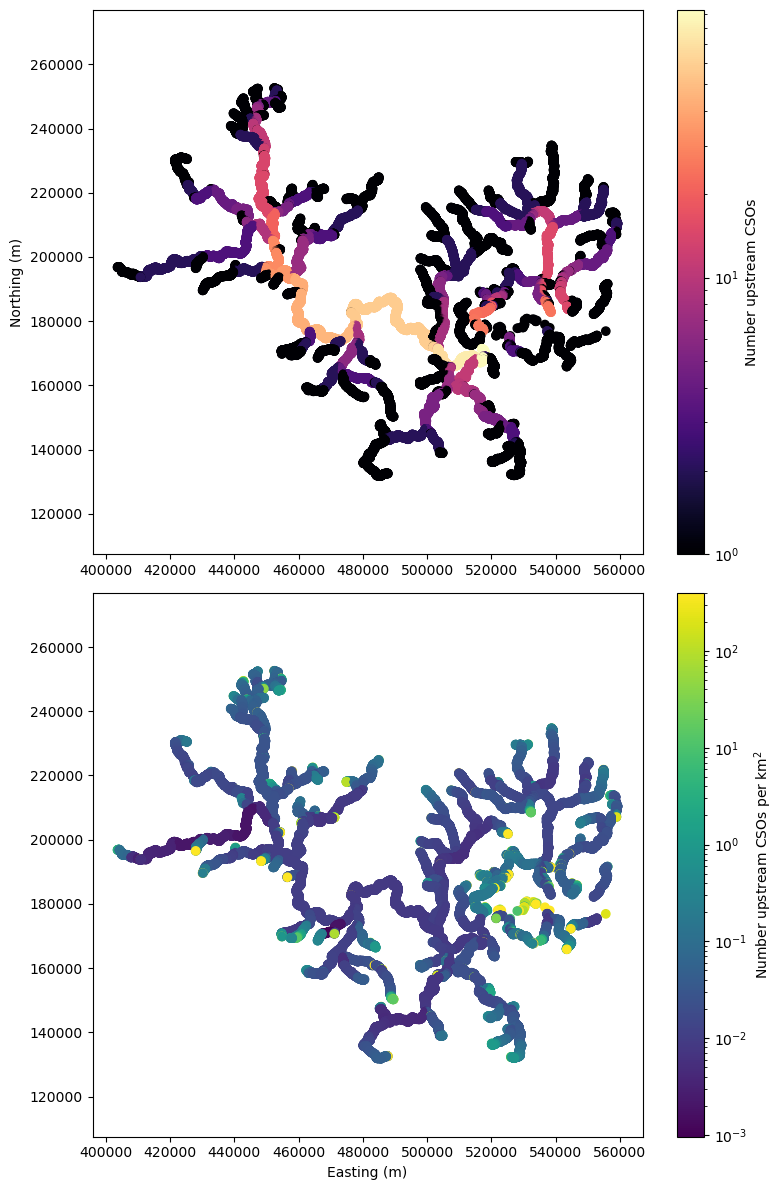

In [16]:
from matplotlib.colors import LogNorm

x, y, num_upst, num_upst_per_km2 = [], [], [], []
for feature in info_geojson.features:
    x.append(feature.geometry.coordinates[0])
    y.append(feature.geometry.coordinates[1])
    num_upst.append(feature.properties["number_upstream_CSOs"])
    num_upst_per_km2.append(feature.properties["number_CSOs_per_km2"])

plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
plt.scatter(x, y, c=num_upst, norm=LogNorm(), cmap="magma")
plt.ylabel("Northing (m)")
plt.axis("equal")
cb = plt.colorbar()
cb.set_label("Number upstream CSOs")
plt.subplot(2, 1, 2)
plt.scatter(x, y, c=num_upst_per_km2, norm=LogNorm(), cmap="viridis")
plt.axis("equal")
cb = plt.colorbar()
cb.set_label("Number upstream CSOs per km$^2$")
plt.xlabel("Easting (m)")
plt.tight_layout()
plt.show()

In the `current_status.ipynb` notebook we saw how we can query what CSOs are upstream of a known point in the river. We explored what was happening upstream of the village of Dorchester on the point on the river Thame which is at Easting = 457850.0 and Northing = 193450.0. We can also see what happened at those points backwards in time too. Let us look to see how many discharges had recently occurred upstream of this point on the 2nd of March, 2025. 



In [17]:
x, y =  457850.0, 193450.0 # Dorchester on the River Thame
time = datetime.datetime(2025, 3, 2) # 2nd March 2025
number, number_per_unit_area = tw.number_of_upstream_discharges(x, y, include_recent_discharges=False, time = time)
print(f"Number of discharges upstream of Dorchester on {time.strftime('%Y-%m-%d')}: {number}")

Number of discharges upstream of Dorchester on 2025-03-02: 5


/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:340: UserWarning: 
! WARNING ! No event found at 2025-03-02 00:00:00 for Stone. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(


So, we can see that there were 12 recent discharges upstream of Dorchester on this date. But, we might want to see how that number changed over a short-period of time, for instance, during a period of heavy rainfall. So, we now calculate the number of discharges that were occurring upstream every 6 hours between the 22nd of February and 6th of March which coincides with a period of high river-flow (as recorded at [the hydrological monitor at Stadhampton](https://environment.data.gov.uk/hydrology/station/4152469d-8ab8-4a4a-aa13-61c5e98dca98)).

/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:340: UserWarning: 
! WARNING ! No event found at 2025-02-22 00:00:00 for Stone. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:340: UserWarning: 
! WARNING ! No event found at 2025-02-22 06:00:00 for Stone. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:340: UserWarning: 
! WARNING ! No event found at 2025-02-22 12:00:00 for Stone. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:340: UserWarning: 
! WARNING ! No event found at 2025-02-22 18:00:00 for Stone. 
Probably the monitor was not active at that time OR has no recorded events. 
  warnings.warn(
/home/alex/Documents/research/projects/PooPy/poopy/poopy.py:

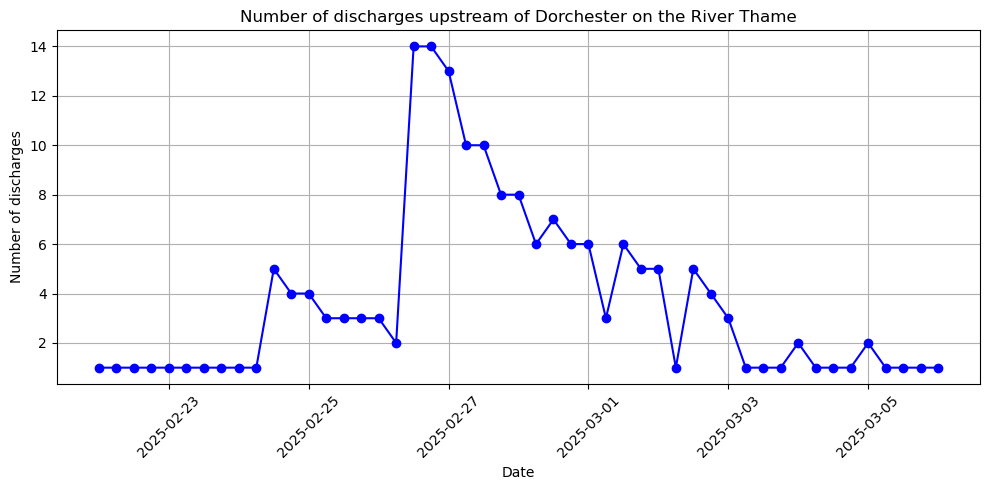

In [18]:
# Create a list of times to query on 6 hourly intervals from 22nd Feb to 6th March 2025
start_time = datetime.datetime(2025, 2, 22)
end_time = datetime.datetime(2025, 3, 6)
delta = datetime.timedelta(hours=6)
time_list = [start_time + i * delta for i in range((end_time - start_time) // delta + 1)]
discharge_list = []
for time in time_list:
    number, _ = tw.number_of_upstream_discharges(x, y, include_recent_discharges=False, time=time)
    discharge_list.append(number)

plt.figure(figsize=(10, 5))
plt.plot(time_list, discharge_list, marker='o', linestyle='-', color='b')
plt.title("Number of discharges upstream of Dorchester on the River Thame")
plt.xlabel("Date")
plt.ylabel("Number of discharges")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

We can see a very clear rise and fall, which coincides with the period of heavy-rainfall! This makes sense!

Finally, lets say we want to look at how CSO overflows have changed over time. Or perhaps how many monitors are online at any one time across a water companies patch. We can do this using the `get_monitor_timeseries()` method of a `WaterCompany`. This generates time series of the number of active CSOs, recently active CSOs and online monitors at 15 minute intervals (the approximate frequency of the data). Lets generate this data from the start of 2022.

In [19]:
since = datetime.datetime(2022, 1, 1)
monitor_series = tw.get_monitor_timeseries(since=since)

Processing (Northern) Low Level No1 Brook Green CSO
Processing 15 Coldharbour Lane, Bushey
Processing Abbess Roding
Processing Abbey Mills Pumping Station CSO
Processing Abbeydale Road
Processing Abingdon
Processing Acton Storm Relief CSO
Processing Aldermaston
Processing Aldershot CSO
Processing Aldershot STW
Processing Alicia Avenue CSO
Processing Allendale Road
Monitor Allendale Road has no recorded events
Processing Alperton Lane
Processing Amersham Balancing Tanks/Amersham Vale STK
Processing Ampney St Peter
Processing Amyand Park Road, Twickenham
Processing Andoversford
Processing Appleton
Processing Arborfield
Processing Arford
Processing Ascot
Processing Ash Ridge (Wokingham)
Processing Ash Vale
Processing Aston Le Walls
Processing Auckland Road Storm Tanks
Processing Avon Dassett
Processing Avondale Rd
Processing Aylesbury
Processing Bakers Farm, High Wych
Processing Bampton
Processing Banbury
Processing Banbury Rd Middleton Cheney
Processing Bancroft Rugby Ground, Buckhurst H

Now lets plot the results.

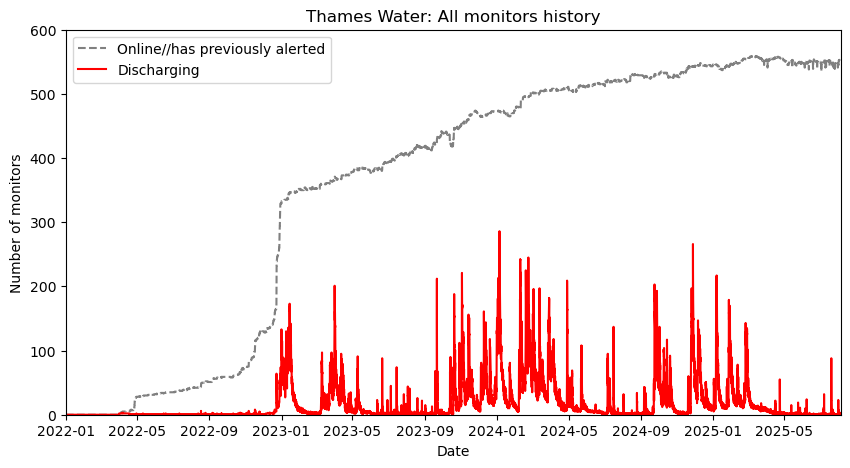

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_online"],
    c="grey",
    label="Online//has previously alerted",
    linestyle="dashed",
)
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_discharging"],
    c="red",
    label="Discharging",
)
plt.ylabel("Number of monitors")
plt.xlabel("Date")
# Set the xlimits to be the min and max of the datetime column
plt.xlim(monitor_series["datetime"].min(), monitor_series["datetime"].max())
plt.ylim(0, 600)
plt.title("Thames Water: All monitors history")
plt.legend()
plt.show()

Note that for "online" we conservatively assume that every monitor was _offline_ until we receive any positive event from it. This means that if a monitor is installed but recording    'NotDischarging' for a month until its first discharge event, it will be counted as offline for that month. Lacking any other information, this is the most conservative assumption we can make.  The first few monitors were attached to the API in April 2022, so the number of monitors "online" since then rises. But, in December '22/January '23 many more were hooked up and so the number of monitors "online" spikes. Since then, the coverage has got gradually better but the number of active monitors has remained fairly constant. It is therefore inappropriate to use this dataset to compare discharge histories between 2022 and 2023, as the number of active monitors has changed so much. You should use the annual returns for that instead. As expected there are more CSOs active during the winter months. To get a more averaged (less 'spiky') view of the data we can look at those which have been active in the last 48 hours (shown below) but the overall picture is the same.

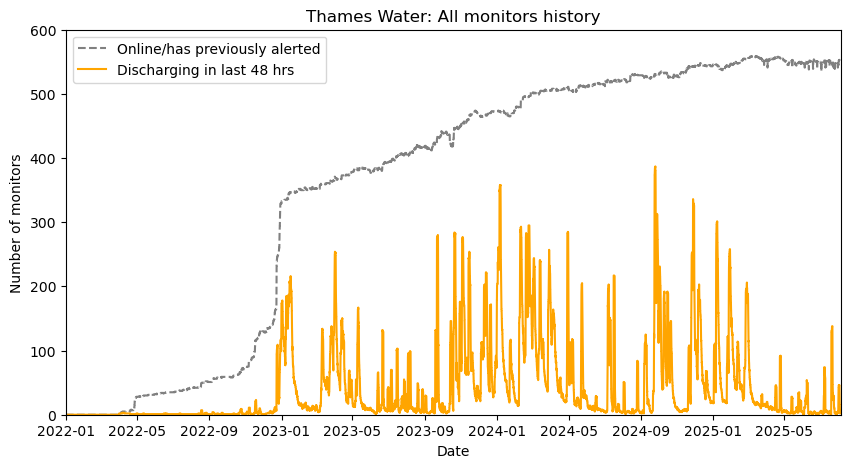

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_online"],
    c="grey",
    label="Online/has previously alerted",
    linestyle="dashed",
)
plt.plot(
    monitor_series["datetime"],
    monitor_series["number_recently_discharging"],
    c="orange",
    label="Discharging in last 48 hrs",
)
plt.ylabel("Number of monitors")
plt.xlabel("Date")
# Set the xlimits to be the min and max of the datetime column
plt.xlim(monitor_series["datetime"].min(), monitor_series["datetime"].max())
plt.ylim(0, 600)
plt.title("Thames Water: All monitors history")
plt.legend()
plt.show()

Finally we can see how easy it is to generate some simple statistics about the data. For example:

In [22]:
number_online_now = monitor_series["number_online"].iloc[-1]
print(f"Number of monitors 'online' now: {number_online_now}")
number_discharging_now = monitor_series["number_discharging"].iloc[-1]
print(f"Number of monitors discharging now: {number_discharging_now}")
print(f"Proportion of monitors discharging now: {number_discharging_now / number_online_now * 100:.2f}%")
number_recently_discharging_now = monitor_series["number_recently_discharging"].iloc[-1]
print(f"Number of monitors discharging in last 48 hrs: {number_recently_discharging_now}")
print(f"Proportion of monitors discharging in last 48 hrs: {number_recently_discharging_now / number_online_now * 100:.2f}%")

Number of monitors 'online' now: 551
Number of monitors discharging now: 0
Proportion of monitors discharging now: 0.00%
Number of monitors discharging in last 48 hrs: 4
Proportion of monitors discharging in last 48 hrs: 0.73%
